In [459]:
import requests
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plotlib
from wordcloud import WordCloud

In [460]:
url = "https://dadosabertos.camara.leg.br/api/v2/deputados"

parametros = {}

resposta = requests.request(method="GET", url=url, params=parametros)
objetos = json.loads(s=resposta.text)
dados = objetos['dados']

In [461]:
data_frame = pd.DataFrame(data=dados)

In [462]:
sns.set(rc={
    'axes.facecolor': '#1A1A1A',
    'axes.edgecolor': '#1A1A1A',
    'figure.facecolor': '#1A1A1A',
    'axes.axisbelow': 'line',
    'axes.labelcolor': '#ebebeb',
    'axes.axisbelow': True,
    'grid.color': '#ebebeb59',
    'grid.linestyle': '-',
    'xtick.color': '#ebebeb',
    'ytick.color': '#ebebeb',
    'patch.force_edgecolor': False,
    'axes.grid': False
})

paleta = 'muted'

In [463]:
data_frame.head()

,id,uri,nome,siglaPartido,uriPartido,siglaUf,idLegislatura,urlFoto,email
0,220593,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,PL,https://dadosabertos.camara.leg.br/api/v2/part...,MT,57,https://www.camara.leg.br/internet/deputado/ba...,dep.abiliobrunini@camara.leg.br
1,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,MDB,https://dadosabertos.camara.leg.br/api/v2/part...,AP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.acaciofavacho@camara.leg.br
2,220714,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,REPUBLICANOS,https://dadosabertos.camara.leg.br/api/v2/part...,AM,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adailfilho@camara.leg.br
3,221328,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,PL,https://dadosabertos.camara.leg.br/api/v2/part...,SP,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adilsonbarroso@camara.leg.br
4,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,PSDB,https://dadosabertos.camara.leg.br/api/v2/part...,BA,57,https://www.camara.leg.br/internet/deputado/ba...,dep.adolfoviana@camara.leg.br


[]

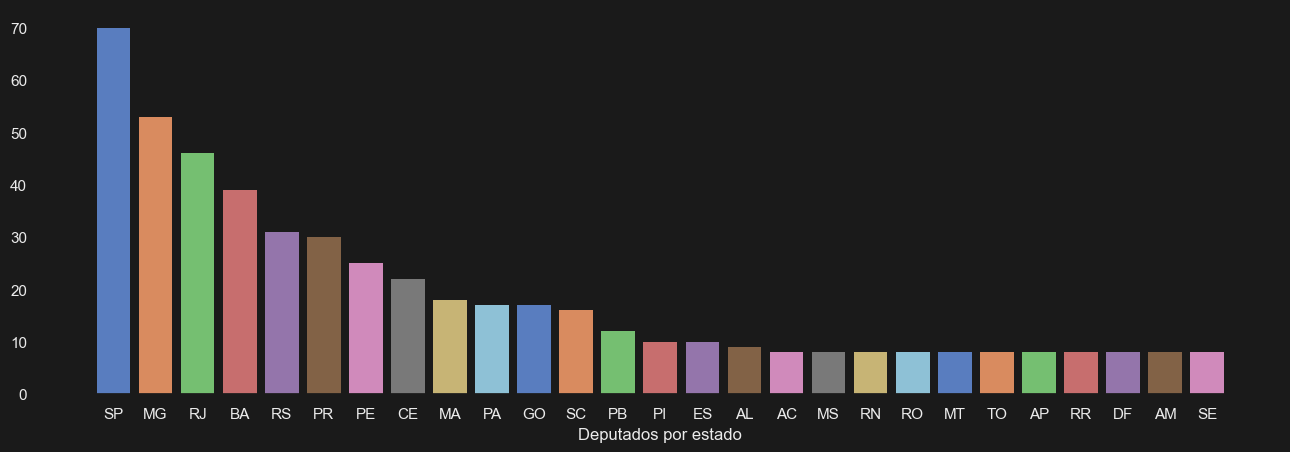

In [464]:
x = data_frame['siglaUf'].value_counts().index
y = data_frame['siglaUf'].value_counts().values

plotlib.figure(figsize = (16, 5))

chart = sns.barplot(x = x, y = y, palette = paleta )
chart.set(xlabel='Deputados por estado', ylabel='')
plotlib.plot()

[]

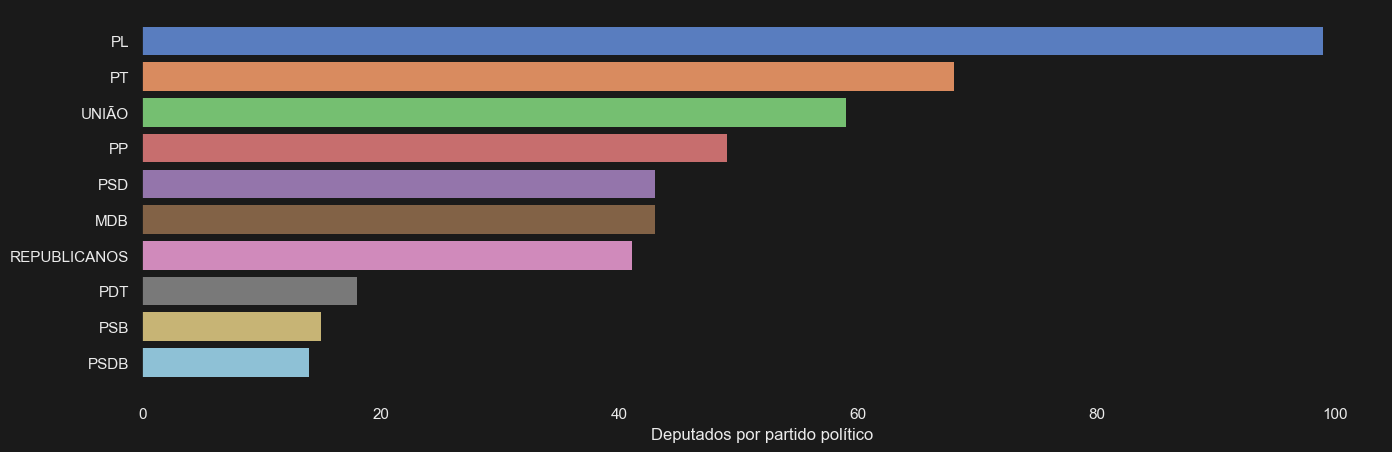

In [465]:
x = data_frame['siglaPartido'].value_counts().head(n=10).values
y = data_frame['siglaPartido'].value_counts().head(n=10).index

plotlib.figure(figsize = (16, 5))
chart = sns.barplot(x = x, y = y, palette = paleta)
chart.set(xlabel='Deputados por partido político', ylabel='')
plotlib.plot()

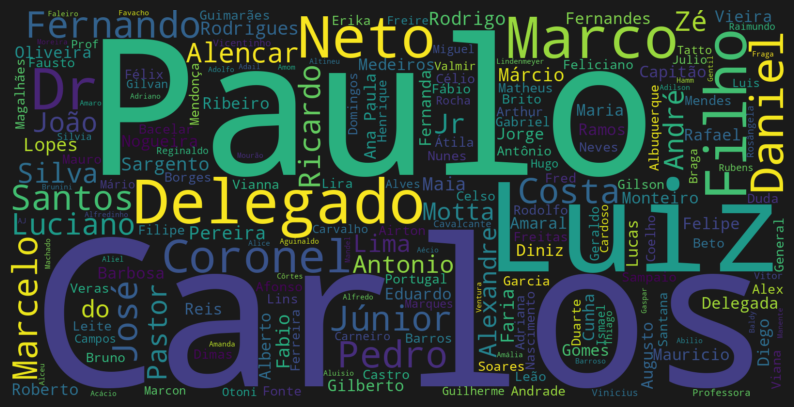

In [466]:
lista_de_nomes = []
for nome in data_frame['nome'].values:
    lista_de_nomes.append(nome)

todos_os_itens = ' '.join(lista_de_nomes)

stop_words = ['de', 'da']

word_cloud_settings = WordCloud (
    stopwords=(stop_words),
    background_color='#1a1a1a',
    width=1600,
    height=800,
)

word_cloud = word_cloud_settings.generate(todos_os_itens)
fig, ax = plotlib.subplots(figsize=(10,6))
ax.imshow(X=word_cloud, interpolation='bilinear')
ax.set_axis_off()